In [6]:
from torch.autograd import Variable
import torch
import torch.autograd
import torch.nn.functional as F
import random
import numpy as np
from params_poly import p
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
from tqdm import tqdm
import pickle as pkl
from os.path import join as oj
import numpy.random as npr
import numpy.linalg as npl
from copy import deepcopy
import pandas as pd
import seaborn as sns
from fit import *
import viz

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# run

In [ ]:
# from params_interactions import p
# device = 'cuda'

# rs = []

# # num_hiddens = [2, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 32, 64, 128, 256]
# # for i, num_h in enumerate(num_hiddens):
# #     p.hidden_size = num_h

# num_layers = [1, 2, 3, 4, 5, 7, 10]
# seeds = [1, 2]
# for seed in seeds:
#     for i, num_lays in enumerate(num_layers):
#         p.seed = seed
#         p.num_layers = num_lays
#         r, X, Y = fit(p)
#         rs.append(r)

# analyze results

In [140]:
# depending on how much is saved, this may take a while
out_dir = 'interactions/test2'
fnames = sorted([fname for fname in os.listdir(out_dir)])

results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames)]
r = pd.concat(results_list, axis=1).T.infer_objects()



  0%|          | 0/35 [00:00<?, ?it/s]

 43%|████▎     | 15/35 [00:00<00:00, 147.10it/s]

 86%|████████▌ | 30/35 [00:00<00:00, 147.88it/s]

100%|██████████| 35/35 [00:00<00:00, 145.59it/s]

In [141]:
def process_results(r):
    xs = ['mse_alt_x' + str(i) for i in range(r.iloc[0].d)]
    r[xs] = pd.DataFrame(r.mse_test_alt.values.tolist(), index=r.index)
    return r

r = process_results(r)


In [142]:
# viz.basic_viz(r, X, Y, device=device)

In [147]:
vals = r.groupby(['num_layers'])
vals_mean = vals.mean().reset_index().sort_values(by='num_layers')
vals_var = vals.var().reset_index().sort_values(by='num_layers')

array([5, 5, 5, 5, 5, 5, 5])

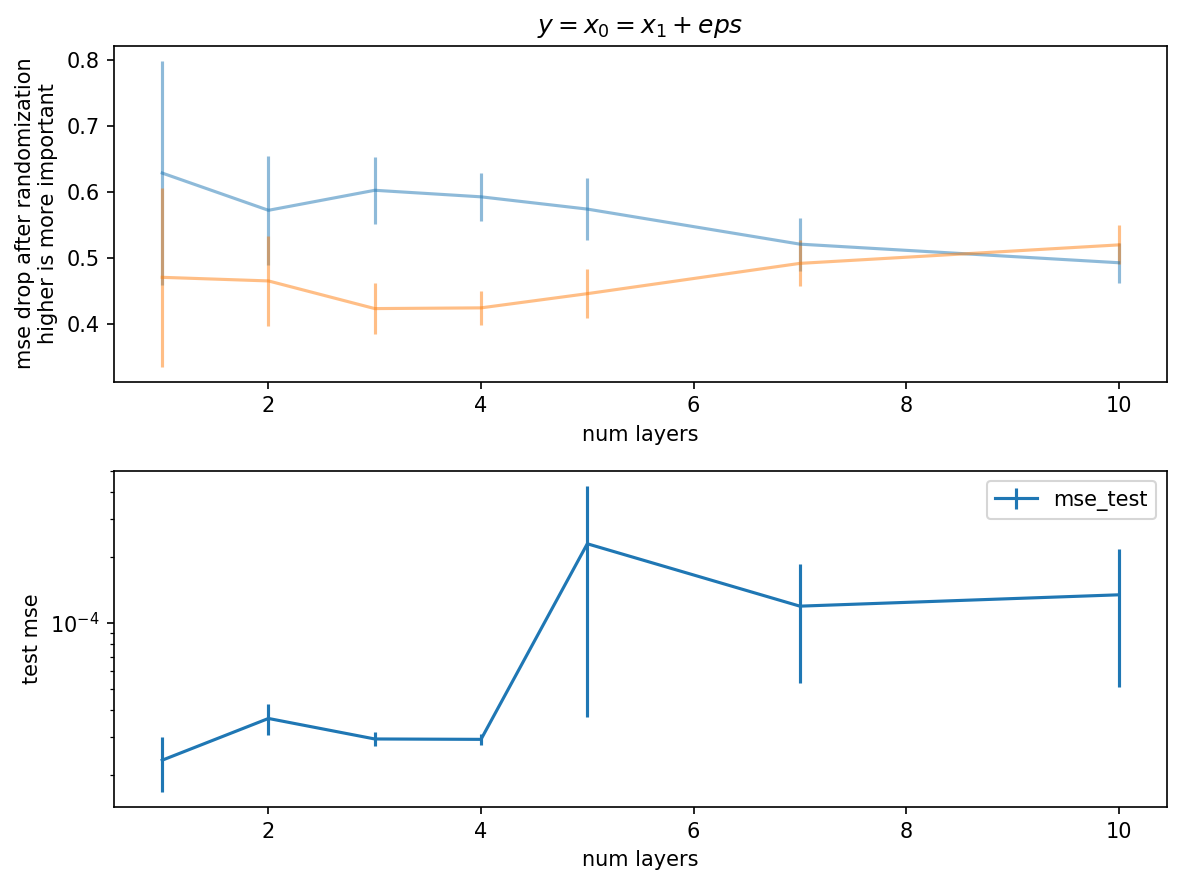

In [178]:
num_vars = 2 # how many vars are we interested in?
num_sweep = 7 # how many things did we sweep over?

xs = vals_mean.num_layers

plt.figure(dpi=150, figsize=(8, 6))
plt.subplot(211)
for i in range(num_vars):
    ys = -1 * (vals_mean['mse_test'] - vals_mean['mse_alt_x' + str(i)])
    ystd = np.sqrt(vals_var['mse_alt_x' + str(i)]) / np.sqrt(vals.size().values)
    plt.errorbar(xs, ys, yerr=ystd, label=f'$x_{i}$', alpha=0.5)
plt.xlabel('num layers')
plt.ylabel('mse drop after randomization\nhigher is more important')
plt.title(f'${p.func}$')

plt.subplot(212)
plt.errorbar(xs, vals_mean['mse_test'], yerr=np.sqrt(vals_var['mse_test']) / np.sqrt(vals.size().values))
plt.xlabel('num layers')
plt.ylabel('test mse')
plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()

**misc extra analysis**

In [33]:
row = results.iloc[0]
print(row.num_layers)

1


In [34]:
row['w'][-1]

array([ 5.1686448e-01,  9.6438408e-01, -2.6361111e-05], dtype=float32)

In [30]:
np.linalg.pinv(X.T @ X) @ X.T @ Y

array([[ 8.00000000e-01],
       [ 4.00000000e-01],
       [-2.77555756e-17]])